<a href="https://colab.research.google.com/github/mldurga/projects/blob/main/modi_beard_aveva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install fastai --upgrade -Uqq
!pip install gradio -qqq


     |████████████████████████████████| 2.9 MB 26.1 MB/s 
     |████████████████████████████████| 53 kB 2.8 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 59.9 MB/s 
     |████████████████████████████████| 253 kB 66.7 MB/s 
     |████████████████████████████████| 212 kB 54.1 MB/s 
     |████████████████████████████████| 2.0 MB 54.5 MB/s 
     |████████████████████████████████| 94 kB 4.6 MB/s 
     |████████████████████████████████| 144 kB 67.2 MB/s 
     |████████████████████████████████| 271 kB 66.9 MB/s 
     |████████████████████████████████| 10.9 MB 64.3 MB/s 
     |████████████████████████████████| 58 kB 6.0 MB/s 
     |████████████████████████████████| 79 kB 10.2 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 4.0 MB 60.3 MB/s 
     |████████████████████████████████| 856 kB 51.2 MB/s 
     |████████████████████

In [2]:
from fastai.vision.all import *

In [3]:
!pip install gdown -qq
!gdown https://drive.google.com/file/d/1D3OmFPEKba4b24pfJYcoWRh9ITr-gOMP/view?usp=sharing --fuzzy -O tmp.zip
!unzip -q tmp.zip -d ./tmp 
!rm tmp.zip

Downloading...
From: https://drive.google.com/uc?id=1D3OmFPEKba4b24pfJYcoWRh9ITr-gOMP
To: /content/tmp.zip
100% 46.7M/46.7M [00:00<00:00, 148MB/s]


In [4]:
path=Path('./tmp')
fns=get_image_files(path)
fns

(#315) [Path('tmp/modi/2021/00000211.jpg'),Path('tmp/modi/2021/00000188.jpg'),Path('tmp/modi/2021/00000027.jpg'),Path('tmp/modi/2021/00000042.jpg'),Path('tmp/modi/2021/00000221.jpg'),Path('tmp/modi/2021/00000102.jpg'),Path('tmp/modi/2021/00000045.jpg'),Path('tmp/modi/2021/00000228.jpg'),Path('tmp/modi/2021/00000216.JPG'),Path('tmp/modi/2021/00000163.jpg')...]

In [5]:
failed=verify_images(fns)
failed.map(Path.unlink)

(#0) []

In [6]:
modi = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224,0.5), batch_tfms=aug_transforms())

dls=modi.dataloaders(path)

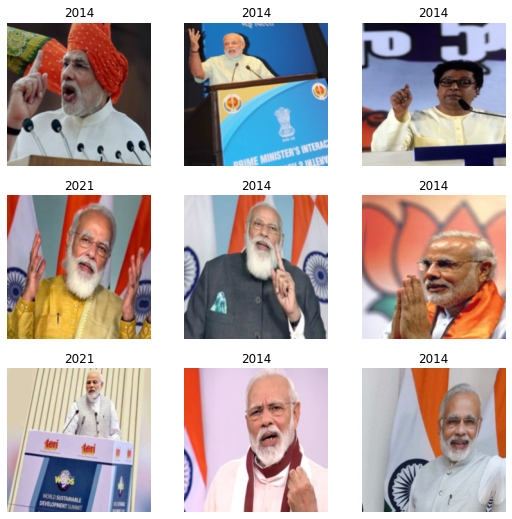

In [7]:
dls.show_batch()

In [8]:
learn=vision_learner(dls,resnet18,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [9]:
learn.fine_tune(10,0.0017)

epoch,train_loss,valid_loss,error_rate,time
0,1.488204,0.556748,0.238095,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.839591,0.469532,0.222222,00:06
1,0.729867,0.450638,0.222222,00:06
2,0.588150,0.421690,0.206349,00:06
3,0.487739,0.380120,0.174603,00:06
4,0.425182,0.363901,0.158730,00:06
5,0.381909,0.353108,0.142857,00:06
6,0.358819,0.334074,0.142857,00:06
7,0.328590,0.306374,0.126984,00:06
8,0.301779,0.280809,0.111111,00:06
9,0.279072,0.252198,0.142857,00:06


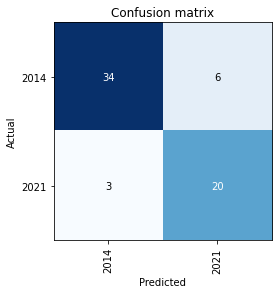

In [10]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

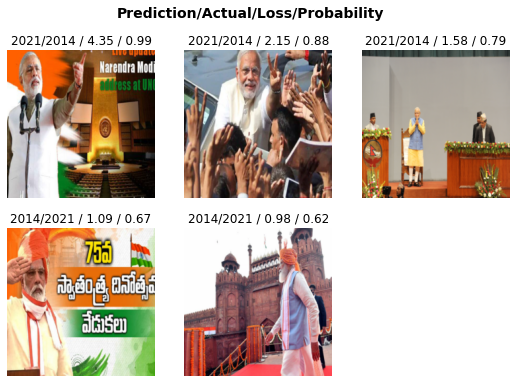

In [11]:
interp.plot_top_losses(5)

In [12]:
learn.export('model.pkl')

In [15]:
import gradio as gr

/usr/local/lib/python3.7/dist-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [16]:
categories=('2014','2021')
def which_modi(img):
    pred,idx,probs=learn.predict(img)
    return dict(zip(categories,map(float,probs)))

In [17]:
image=gr.inputs.Image(shape=(192,192))
label=gr.outputs.Label()
intf=gr.Interface(fn=which_modi,inputs=image,outputs=label)
intf.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://58893.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7fe62b0f9f90>,
 'http://127.0.0.1:7860/',
 'https://58893.gradio.app')